# ASTR 1040 Problem Set 6

The first cell (below) contains lots of helpful constants you may need to use throughout the semester. Make sure to run it each time before you start working! 

For reference, all of the `astropy` constants as well as examples can be found [here](https://docs.astropy.org/en/stable/constants/index.html). Likewise all of the units and their names / how to access them can be found [here](https://docs.astropy.org/en/stable/units/index.html). 

To create a variable with units you need to multiply by the corresponding unit class:

```python
d = 1 * units.au
```

You can then convert unitful quantities to other units by calling the `to` method and passing the desired end unit class: 

```python
d_m = d.to(units.m)
```

If you have a ratio of quanities where all the units should cancel out, you can obtain the dimensionles number using the `dimesionless_unscaled` method. For example writing:
```python
d_m/d
``` 
yields $1.4959787\times 10^{11} \rm{\frac{m}{AU}}$, but doing:
```python
(d_m/d).to(units.dimensionless_unscaled)
```
returns `1.0` as expected.

In [2]:
#SETUP CELL (modify at your own peril)
from astropy import units #access units by doing units.<unit> (i.e. units.au)
from astropy import constants
import numpy as np #common math functions (i.e. np.sin(x)) and better arrays (i.e. np.array([1,2,3])
import matplotlib.pyplot as plt #plotting functions (i.e. plt.plot(x,y))
G = constants.G # gravitational constant
M_sun = constants.M_sun # mass of the sun
R_sun = constants.R_sun # radius of the sun
L_sun = constants.L_sun # luminosity of the sun
M_earth = constants.M_earth # mass of the earth
R_earth = constants.R_earth # radius of the earth
M_jup = constants.M_jup # mass of jupiter
R_jup = constants.R_jup # radius of jupiter
sigma_sb = constants.sigma_sb # Stefan-Boltzmann constant
b_wien = constants.b_wien # Wien's displacement constant
c = constants.c # speed of light
h = constants.h # Planck constant
k_B = constants.k_B # Boltzmann constant
m_e = constants.m_e # mass of electron
m_p = constants.m_p # mass of proton 
m_n = constants.m_n # mass of neutron (basically just the mass of a proton but whatever)
g0 = constants.g0 # standard gravity, 9.8 m/s^2
e = constants.e # absolute value of electron/proton charge

### Note: By now I trust that you know how to insert and edit markdown/code cells in your Jupyter notebooks, so I'm only including the questions and leaving it up to you to split/insert cells as needed to provide your answers (see the edit and insert menus at the top of the page).

## Problem 1: Proof of a black hole? [50 points]

The galactic center group at UCLA has done remarkable work measuring the orbits of stars close to the supermassive black hole at the center of our galaxy (check out some cool movies of their work [here](https://galacticcenter.astro.ucla.edu/animation.html)). 

The closest star to our supermassive black hole &mdash; S2 &mdash; has an orbit that has been fully observed (i.e. we've watched it go around at least one full revolution).

### a.) Estimating enclosed mass from orbital parameters: [5 points]
Given that the period of its orbit is roughly 16 years and it has a semimajor axis of roughly 1000 AU, estimate the mass enclosed within the orbit of S2.

$$
 (M_1 + M_2) = \frac{4\pi^2}{G} \cdot \frac{a^3}{p^2}
$$

In [3]:
p = 16 * units.year
a = 1000 * units.AU

enclosed_mass = ((4 * (np.pi ** 2)) / G) * ((a ** 3) / (p ** 2))

print("mass enclosed within the orbit of S2:", enclosed_mass.to(units.M_sun))

mass enclosed within the orbit of S2: 3906397.5540979193 solMass


### b.) How big is the black hole? [5 points]
What is the Schwarszchild radius ($R_s$) of a hypothetical supermassive black hole with the mass you calculated in part a? 

$$
    R = \frac{2MG}{c^2}
$$

In [3]:
radius = (2 * enclosed_mass * G) / (c ** 2)
print("Schwarszchild radius:", radius.si)

Schwarszchild radius: 11536568873.91751 m


### c.) How fast? [20 points]
At perihelion S2 is the fastest moving star known to humanity. Its orbit is highly elliptical (*not* circular), with an eccentricity $e \approx 0.88$. Previously in class we have always assumed circular orbits, and while this works for many things when the eccentricity is high like this we must account for this in our equations.

At perihelion (closest approach, which we will denote $r_p$) and aphelion (farthest approach, which we will denote $r_a$) the velocity of the star is purely tangential (i.e. at right angle with semi-major axis). The eccentricity $e$ is defined in such a way that $r_p = a(1-e)$ and $r_a = a(1+e)$ (you can intuitively see that this works because for a circle $e = 0$ and $r_p = a = r_a$). 

Utilizing the fact that angular momentum and total energy must be conserved, and that the velocities are purely tangential at these two points, derive a formula for the velocity of the star at perihelion and calculate the maximum speed of S2 as a percentage of the speed of light.

**Hint:** you *cannot* just use $v = \sqrt{\frac{GM}{r}}$ (your answer will be wrong by a factor of $\approx 1.4$, and you should see why if you successfully do this out).

**Note for people doing this in Jupyter notebook:** You must show your work to get credit for this part! You can type in math by using LaTeX syntax &mdash; good examples showing how to do this [here](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html)

$$r_p = a(1-e)$$
$$r_a = a(1+e)$$


I tried to solve this with Angular momentum and Energy but kept ending up with an absolute mess so I am going to start from the visa vis equation

$$v_p^2 = GM(\frac{2}{r_p} - \frac{1}{a})$$

$$v_p^2 = GM(\frac{2}{a(1-e)} - \frac{1}{a})$$

$$v_p^2 = GM(\frac{2 - (1-e)}{a(1-e)})$$

$$v_p^2 = \frac{GM}{a} \frac{(1 + e)}{(1-e)}$$

$$v_p = \sqrt{\frac{GM}{a} \frac{(1+e)}{(1-e)}}$$

In [4]:
e = .88
a = 1000 * units.AU
M = enclosed_mass

v_p = np.sqrt((G * M * (1 + e)) / (a * (1-e)))

print("The max speed of the star is about ", v_p.si / c, "percent the speed of light")

The max speed of the star is about  0.024578135226586865 percent the speed of light


### d.) Do we need relativity? [5 points]

Based on your answer to part c, does relativity play a *large* role in determing the orbit of S2? Why or why not? If yes, should we trust our answers to parts a, b, and c?


No, relativity does not play a large role in determining the orbit of S2, we usually start to see relativistic effects at 0.1 times the speed of light. We can probably test our answers to parts a, b and c

### e.) Supermassive water blobs: [10 points]

$r_p$ places an upper limit on the extent the mass interior to S2 *could* have. Suppose all of the mass driving the orbit was in a sphere with radius $r_p$ &mdash; what would its density be? Compare your answer to the density of a black hole of the same mass. What if all of the mass interior to S2's orbit was a giant sphere of water (density $\sim 1000 \textrm{ kg}/\rm{m^3}$) &mdash; would we be able to tell the difference based on the orbit alone? 

Google around and comment on a few other reasons we think the center of the galaxy is host to a supermassive black hole and not a supermassive blob of water. 

blackhole density eq
$$\rho = \frac{3c^6}{32\pi{G^3}M^2}$$

In [5]:
r_p = a * (1 - e)

pwater = 1000 * units.kg / (units.m ** 3)

density = enclosed_mass / (r_p ** 3)

density_black_hole = (3 * c ** 6) / (32 * np.pi * G ** 3 * enclosed_mass ** 2)

print("The density would be ", density.si, "which is much lower than the density of water:", pwater)
print("The expected density of a blackhole with this mass would be ", density_black_hole.si)

The density would be  0.001342648637390699 kg / m3 which is much lower than the density of water: 1000.0 kg / m3
The expected density of a blackhole with this mass would be  1207713.0270809147 kg / m3


Reasons why we think the center of the galaxy is a supermassive black hole and not water:
* We assume that our galaxy is not unique, we have detected other Black holes at the center of other galaxies like M87
* Black holes provide a great gravitational building block for Galaxies to form around
* It would be insanely odd if there was that many water molecules at the center of our galaxy

### f.) Photographic evidence: [5 points]
Conclusive "proof" that there is a black hole at the center of our galaxy was obtained more recently by the EHT, which found emission coming from a region $\sim 2-3 R_s$ away from the central object. Given your answer to e, what makes this observation the strongest evidence yet that Sag A* is a black hole?

If Sag A * was not a Black hole, we would expect to see emssion from within $R_s$ but since the only emssion is from outside the event horizon we can assume that the emssion is the portion of light that escaped.

## Problem 2: Twin "paradox" [20 points]

In special relativity time dilation goes like $\Delta t' = \gamma \Delta t$ (with $\gamma = \frac{1}{\sqrt{1-v^2/c^2}}$). But whose time corresponds to $\Delta t$ and whose corresponds to $\Delta t'$? This is where the famous "twin paradox" arises from: the twin in the spaceship will observe the Earth to be moving at a constant speed while the twin on Earth will observe the spaceship to be the thing that is moving, thus won't they disagree about who ends up older? 

One often invoked "resolution" of the twin paradox is to say that you need to use *general* relativity to resolve this, since when the twin in the spaceship turns around they must accelerate and thus we must do all of the time dilation calculations in GR. **This is wrong**. The twin paradox can be easily resolved with special relativity alone! 

Read the explanation on the [Wikipedia page](https://en.wikipedia.org/wiki/Twin_paradox#Relativity_of_simultaneity), and in particular look at the diagram in the "relativity of simultaneity" section. This question is purely qualitative, but I'd like you to explain (in your own words) the following:

### a.) What is a Minkowski diagram? [10 points]

Google, use the Wikipedia page, your book, or any other resources you like, and explain in your own words what Minkowski diagrams represent. What determines the lines of simultaneity and why does light have a slope of $\pm$1 (in the usual case where the time axis is in terms of $ct$)? 


The lines of simultaneity depict what information can possibly be communicated between two positions in spacetime. Information cannot travel faster than the speed of light and thus there must be a delay between the time something happens in one position and the time the other position is updated.

Light has a slope of $\pm1$ because the axis are in terms of ct and x. 

$\frac{rise}{run}$: $\frac{ct}{x} = \frac{x\cdot{t}}{t}\cdot\frac{1}{x} = 1$

### b.) Resolving the twin paradox: [10 points]

How does the Minkowski diagram on the Wiki page resolve the twin paradox? Does this use general relativity? Explain, in your own words and basing your answer off of the Minkowski diagram, what an observer on the ship would see as they turned around in terms of the corresponding time on Earth. What about the twin on Earth &mdash; what do they see? 

The only part of special relativity that his uses is that the speed of light is constant.
The observer on the ship would see the corresponding time on Earth update much faster than local time. This is because the "information" that they have been running away from finally gets to reach the observer on the ship. The Twin on Earth would see the corresponding ship time to update slower as the ship turned around for similar reasons.

## Problem 3: Special relativity and the Kessel Run [30 points]

The Empire has recently greatly restricted trading, making it difficult for smugglers to ferry supplies to the Rebels. Fortunately, Han Solo discovers that Imperial scanners don't work properly on ships that are moving sufficiently fast, and he is commissioned by the Resistance to complete the famous "Kessel run" trading route, bringing back much-needed supplies for the war effort. 

He sets off from the Rebel base in the Millenium Falcon at 2/3 of the speed of light (the precise speed at which the Imperial scanners fail) to complete the Kessel run. From the rest-frame of the Empire / Resistance cartographers they measure the Kessel Run trade route to be a distance (to two significant figures) of 16 parsecs (round trip, 8 parsecs each way).

In [6]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/fjYuw6zWk_Y?si=vaV80xRfIxJWJDbd" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### a.) How long does the entire journey take (in years), as measured by Han Solo aboard the Millenium Falcon? [10 points]

$\Delta t' = \gamma \Delta t$ (with $\gamma = \frac{1}{\sqrt{1-v^2/c^2}}$

In [7]:
v = (2/3) * c

gamma = 1 / np.sqrt(1 - (v ** 2 / c ** 2))

d_o = 16 * units.parsec

tprime = d_o / v

t = tprime / gamma

print(t.to(units.year))
print("Han Solo thinks the journey takes 58.3 years")

58.34462654957887 yr
Han Solo thinks the journey takes 58.3 years


### b.) World-lines in a galaxy far, far away: [5 points]
Draw a Minkowski diagram illustrating the journey. Include a world-line for the rebels and one for the crew of the Millenium Falcon. Include at least 4 lines of simultaneity (one at beginning of trip, two at the middle, and one at the end) and label their slopes.

**Note:** If you are completing your homework in a Jupyter notebook you can draw your diagram by hand and embed a picture in your notebook following the steps [here](https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o).

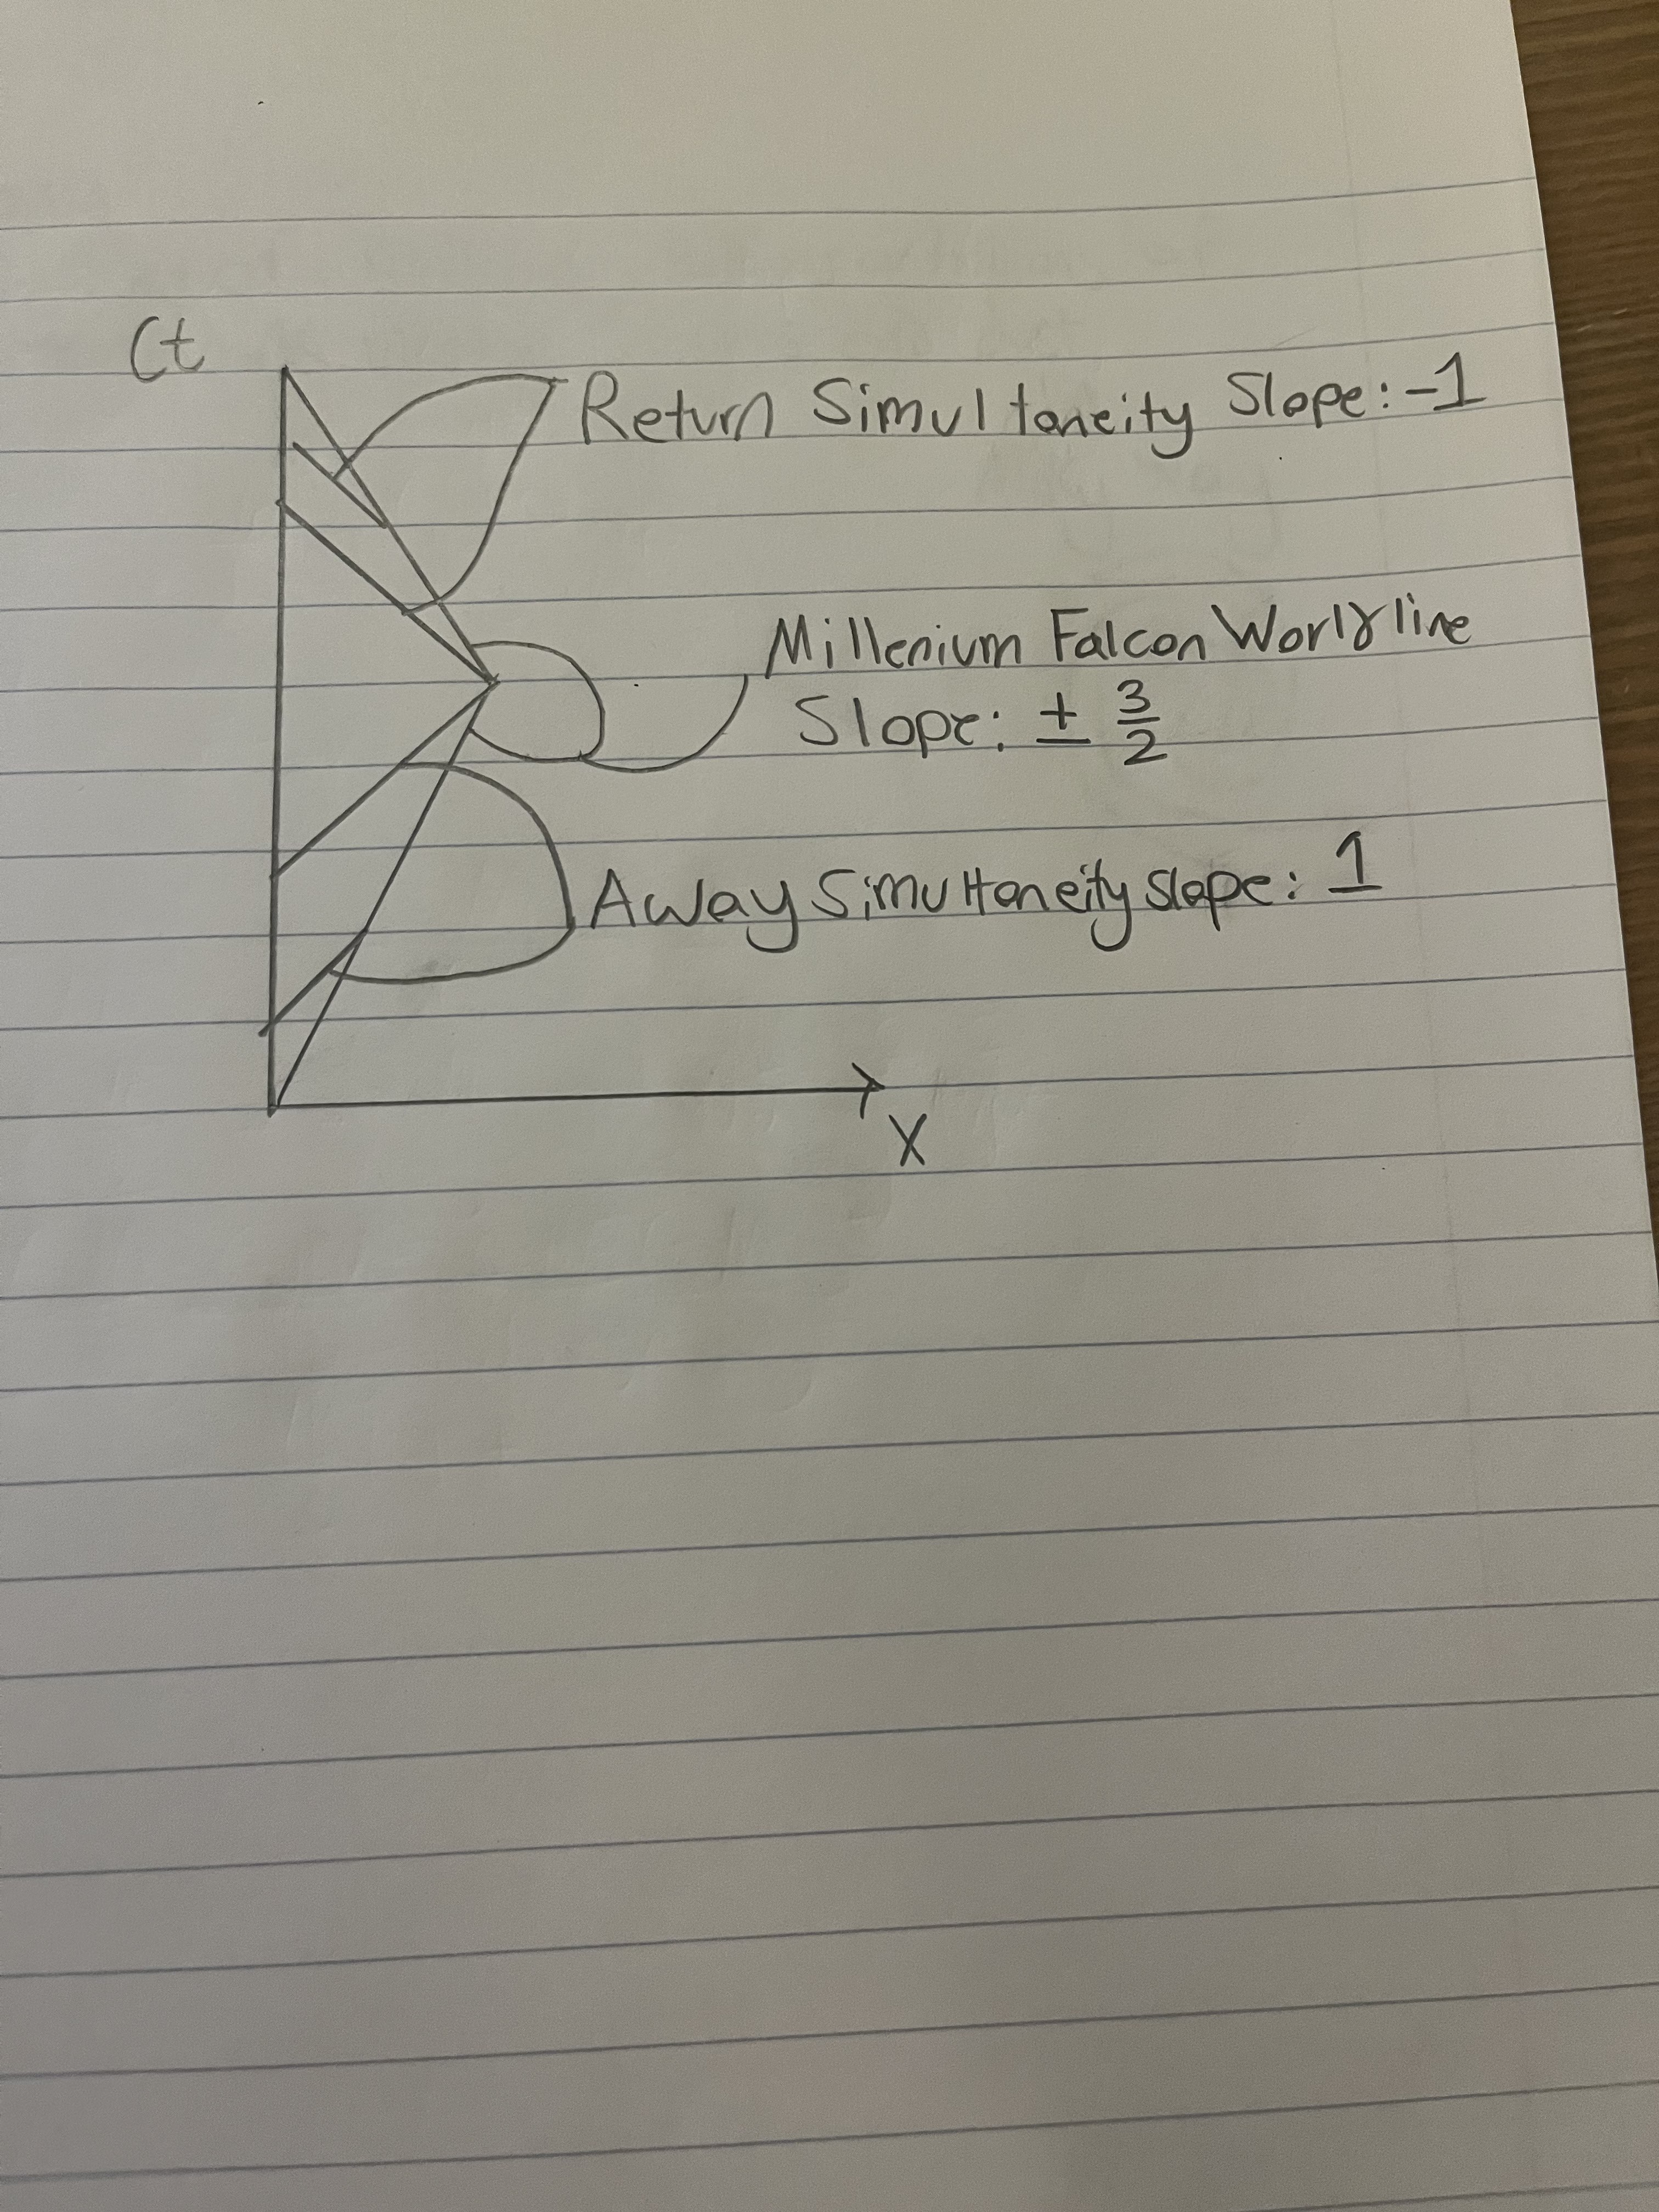

### c.) Twin paradox redux: [5 points]
When he returns, what is the age difference (in years) between the rebels who stayed behind on the secret base vs. Han Solo? Who aged less, and why? 

In [8]:
print(tprime.to(units.year) - t)

19.932904102439544 yr


The age difference between the two rebels and Han Solo is almost 20 years.




### d.) Kessel run in 12 pc? [10 points]
What distance does Han Solo measure for the length of the Kessel Run? Answer to two significant figures and compare with Star Wars lore, which quotes a distance of 12 pc. 

In [9]:
print(t * c * (2 / 3))

11.925695879998878 pc


Han Solo percieves the Kessel Run to take 58.3 years. Traveling at 2/3rds the speed of light he would expect to have only traveled 12 parsecs. This is precisely what Han Solo quotes when bragging about his accomplishment.

Side note: Many people get mad thinking he uses parsecs as a unit of time but another interpretation could be that its impressive that the piercived distance was only 12pc as the faster you travel, the lower your percieved distance is.